# Data Preparation

My initial task is to prepare and get myself familiar with the dataset [Suomi24-toxicity-annotated](https://huggingface.co/datasets/TurkuNLP/Suomi24-toxicity-annotated).

In [1]:
from datasets import load_dataset

dataset = load_dataset(
    "TurkuNLP/Suomi24-toxicity-annotated",
    split="test",
)

dataset.shuffle()

dataset = dataset.select(range(200))

/home/roni/dev/thesis/qlora-gpt-fine-tuning/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Now that dataset is downloaded, it's a good idea to do some EDA and e.g. see in what proportion data is labeled.

/home/roni/dev/thesis/qlora-gpt-fine-tuning/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/roni/dev/thesis/qlora-gpt-fine-tuning/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/roni/dev/thesis/qlora-gpt-fine-tuning/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/home/roni/dev/thesis/qlora-gpt-fine-tuning/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dty

<Axes: xlabel='count'>

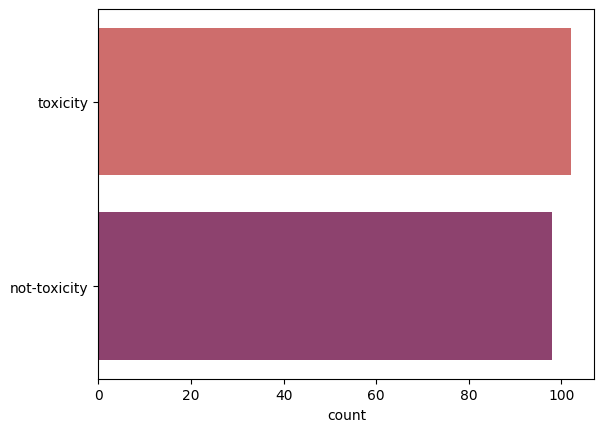

In [2]:
import seaborn as sns

sns.countplot(y=dataset["label"], palette="flare")

One thing we can try to see is if the toxic and non-toxic data instances make any clusters in the data.

In [3]:
from transformers import pipeline

checkpoint = "TurkuNLP/bert-large-finnish-cased-toxicity"
feature_extractor = pipeline("feature-extraction",framework="pt",model=checkpoint)

In [4]:
labels, texts = dataset['label'], dataset['text']

In [5]:
from tqdm import tqdm

wordVecs = []

for text in tqdm(texts):
    e = feature_extractor(texts[0], return_tensors="pt")[0].numpy().mean(axis=0)

    wordVecs.append(e)

100%|██████████| 200/200 [01:19<00:00,  2.52it/s]


In [6]:
colors = list(set(labels))

color_labels = [colors.index(l) for l in labels]

One thing to take account is that the embedding vectors have quite large dimensionality and projecting them onto two dimensions might be unpractical.


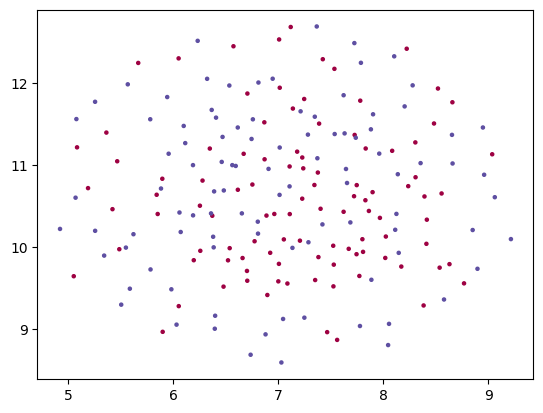

In [8]:
import umap

import matplotlib.pyplot as plt

mapped_embedding = umap.UMAP(random_state=42).fit_transform(wordVecs)
plt.scatter(mapped_embedding[:, 0], mapped_embedding[:, 1], c=color_labels, s=5, cmap="Spectral")

With number of 200 (low) data instances the data looks quite uniformal.